In [1]:
from pyscripts.shp_utils import get_region_and_profile_to_merge, load_shape_file_into_gdf, get_bbox_and_transform, plot_profile_with_regions, add_zone_names_to_ecoregions
import os
from pathlib import Path
import matplotlib.pyplot as plt

d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


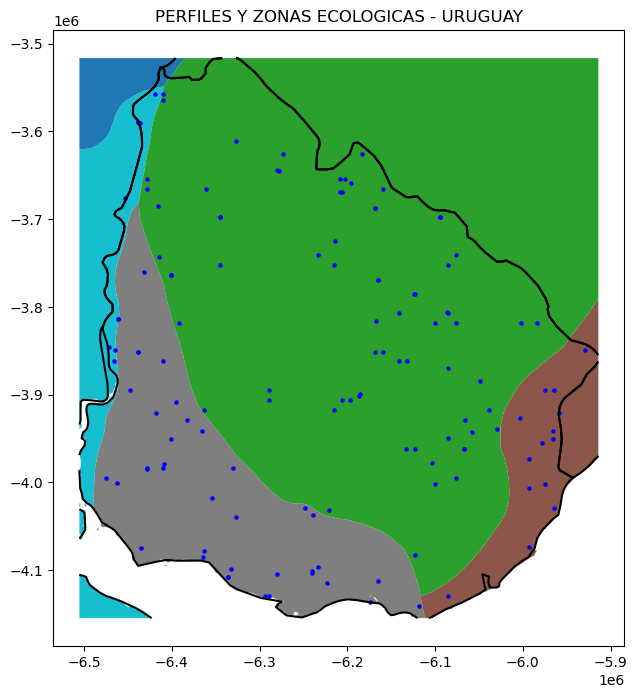

In [18]:
shapes_df, profiles_gdf = get_region_and_profile_to_merge('Uruguay', 'sa_eco_l3')
bbox = get_bbox_and_transform('UY')

fig, ax = plt.subplots(1, 1, figsize=(15,8))
base = shapes_df.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(column='LEVEL3', ax = ax)
# profiles plot
profiles_gdf.plot(ax=base, marker='o', color='blue', markersize=5)

# uruguay boundary plot
country_borders_gdf = load_shape_file_into_gdf('country_borders')
country_borders_gdf.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='black')
base.set_title("PERFILES Y ZONAS ECOLOGICAS - URUGUAY")
plt.show()



d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


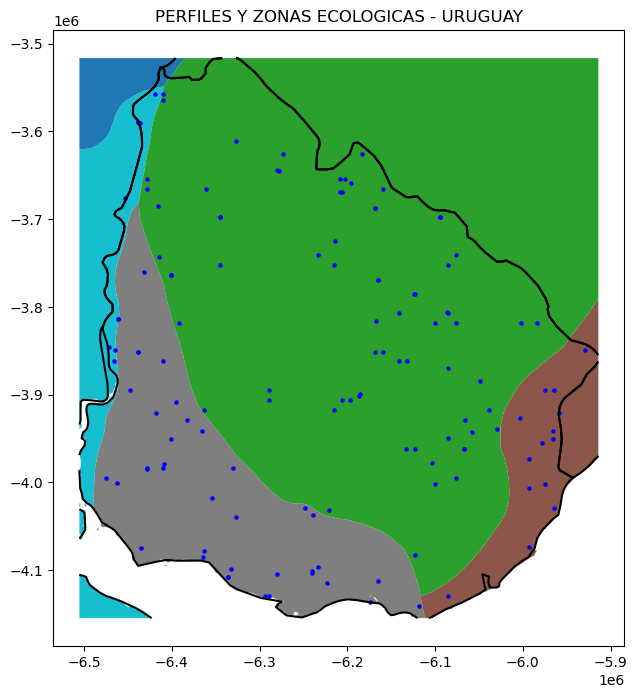

In [2]:
plot_profile_with_regions('Uruguay', 'sa_eco_l3', 'LEVEL3', "PERFILES Y ZONAS ECOLOGICAS - URUGUAY")

In [2]:
gdf = load_shape_file_into_gdf('zonas_suelo_uy')
gdf

,ID,GEOFORMA,geometry
0,3,Retroceso del frente de Cuesta,"POLYGON ((-6248464.212 -3595696.360, -6247590...."
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189...."
2,8,Fosa Tectonica del Santa Lucia,"POLYGON ((-6160870.454 -4050087.038, -6159894...."
3,6,Región Centro Sur,"POLYGON ((-6398381.991 -4055525.165, -6400055...."
4,10,Colinas y Lomas del Este,"MULTIPOLYGON (((-5993181.138 -4014972.518, -59..."
5,9,Sistema de Planicies y Fosa de la L. Merin,"MULTIPOLYGON (((-6393982.052 -3904765.090, -63..."
6,5,Cuenca Sedimentaria del Litoral Oeste,"MULTIPOLYGON (((-6471586.131 -3786564.092, -64..."
7,2,Cuenca Sedimentaria del Noreste,"MULTIPOLYGON (((-6192073.294 -3707990.995, -61..."
8,1,Cuesta Basaltica,"MULTIPOLYGON (((-6373041.372 -3909347.133, -63..."
9,11,Agua,"POLYGON ((-6221122.829 -3833960.236, -6220621...."


d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


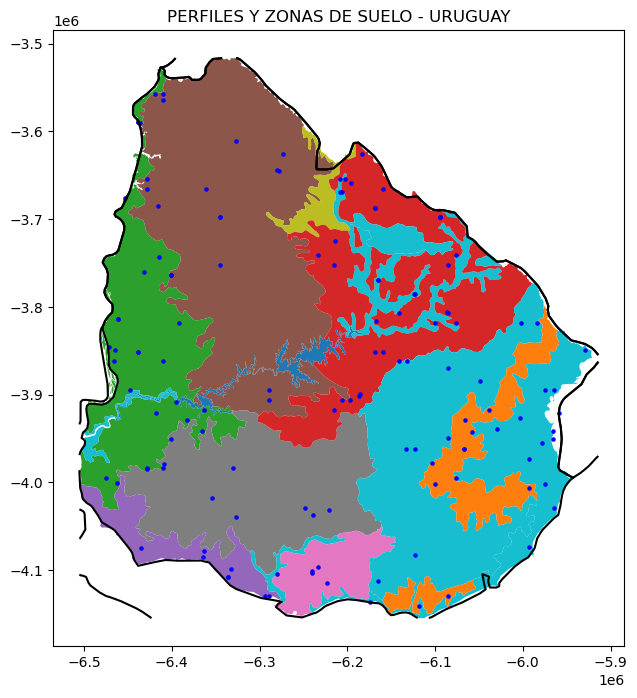

In [4]:
plot_profile_with_regions('Uruguay', 'zonas_suelo_uy', 'GEOFORMA', "PERFILES Y ZONAS DE SUELO - URUGUAY", to_file=True)

In [8]:
shapes_df, profiles_gdf = get_region_and_profile_to_merge('Uruguay', 'zonas_suelo_uy')
profile_regions = shapes_df.sjoin(profiles_gdf, predicate='contains')

In [9]:
profile_regions

,ID,GEOFORMA,geometry,index_right,profile_id,country_name,bdfi33_pond_val,clay_pond_val,orgc_pond_val,latitude,longitude,bd_0_30_soilgrids
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189....",36,68657,Uruguay,NaN,24.67,31.75,-34.750000,-56.533333,1.36
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189....",113,70847,Uruguay,NaN,26.14,39.53,-34.590000,-56.919722,1.48
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189....",114,70849,Uruguay,NaN,10.77,20.37,-34.590000,-56.919722,1.48
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189....",111,70845,Uruguay,NaN,41.00,19.66,-34.520000,-56.889722,1.51
1,7,Cuenca Sedimentaria del Suroeste,"POLYGON ((-6288822.063 -4124904.468, -6284189....",130,71450,Uruguay,NaN,37.07,31.74,-34.419722,-57.169722,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...
10,4,Sierras del Este e Isla Cristalina de Rivera,"MULTIPOLYGON (((-6053449.076 -3752761.512, -60...",100,70519,Uruguay,NaN,9.60,16.80,-33.500000,-55.000000,1.43
10,4,Sierras del Este e Isla Cristalina de Rivera,"MULTIPOLYGON (((-6053449.076 -3752761.512, -60...",109,70809,Uruguay,NaN,16.00,11.66,-33.500000,-55.099722,1.42
10,4,Sierras del Este e Isla Cristalina de Rivera,"MULTIPOLYGON (((-6053449.076 -3752761.512, -60...",118,70855,Uruguay,NaN,12.13,15.66,-33.409722,-54.659722,1.45
10,4,Sierras del Este e Isla Cristalina de Rivera,"MULTIPOLYGON (((-6053449.076 -3752761.512, -60...",43,68664,Uruguay,NaN,35.63,44.37,-32.916667,-54.333333,1.44


In [10]:
profile_regions[['GEOFORMA', 'profile_id', 'clay_pond_val', 'orgc_pond_val', 'bdfi33_pond_val', 'bd_0_30_soilgrids']] \
                .groupby('GEOFORMA').agg({'profile_id':'count',
                                         'clay_pond_val':['mean', 'std'],
                                         'orgc_pond_val':['mean', 'std'],
                                         'bdfi33_pond_val':['mean', 'std'],
                                         'bd_0_30_soilgrids':['mean', 'std']})

profile_id clay_pond_val  \
                                                  count          mean   
GEOFORMA                                                                
Agua                                                  2     35.435000   
Colinas y Lomas del Este                             11     27.334545   
Cuenca Sedimentaria del Litoral Oeste                23     26.042609   
Cuenca Sedimentaria del Noreste                      30     22.962069   
Cuenca Sedimentaria del Suroeste                      7     29.917143   
Cuesta Basaltica                                     18     31.134444   
Fosa Tectonica del Santa Lucia                        5     54.246000   
Región Centro Sur                                     8     32.942500   
Sierras del Este e Isla Cristalina de Rivera         10     20.582222   
Sistema de Planicies y Fosa de la L. Merin           15     20.426667   

                                                        orgc_pond_val  \
                                                    std          mean   
GEOFORMA                                                                
Agua                                          17.769593     28.430000   
Colinas y Lomas del Este                       6.471785     20.857273   
Cuenca Sedimentaria del Litoral Oeste         14.082095     19.637391   
Cuenca Sedimentaria del Noreste               12.289005     17.811333   
Cuenca Sedimentaria del Suroeste              10.262904     27.320000   
Cuesta Basaltica                              20.003954     21.557647   
Fosa Tectonica del Santa Lucia                36.296967     27.122000   
Región Centro Sur                             10.061333     26.615000   
Sierras del Este e Isla Cristalina de Rivera  11.824783     17.612000   
Sistema de Planicies y Fosa de la L. Merin    10.715424     41.120667   

                                                         bdfi33_pond_val  \
                                                     std            mean   
GEOFORMA                                                                   
Agua                                           13.534024             NaN   
Colinas y Lomas del Este                        4.027292        1.500000   
Cuenca Sedimentaria del Litoral Oeste          10.248425        0.747500   
Cuenca Sedimentaria del Noreste                10.062028        1.455000   
Cuenca Sedimentaria del Suroeste                7.656435        3.040000   
Cuesta Basaltica                               16.756781        1.023333   
Fosa Tectonica del Santa Lucia                 20.473001        2.230000   
Región Centro Sur                               9.598701        2.560000   
Sierras del Este e Isla Cristalina de Rivera   11.000005        1.480000   
Sistema de Planicies y Fosa de la L. Merin    100.187583        1.680000   

                                                       bd_0_30_soilgrids  \
                                                   std              mean   
GEOFORMA                                                                   
Agua                                               NaN          0.755000   
Colinas y Lomas del Este                           NaN          1.447273   
Cuenca Sedimentaria del Litoral Oeste         0.867386          1.443913   
Cuenca Sedimentaria del Noreste               0.172337          1.479000   
Cuenca Sedimentaria del Suroeste                   NaN          1.488571   
Cuesta Basaltica                              0.085049          1.493889   
Fosa Tectonica del Santa Lucia                     NaN          1.516000   
Región Centro Sur                                  NaN          1.485000   
Sierras del Este e Isla Cristalina de Rivera       NaN          1.405000   
Sistema de Planicies y Fosa de la L. Merin         NaN          1.410667   

                                                        
                                                   std  
GEOFORMA                                             

# Cruzando zonas ecologicas con suelos

In [11]:
gdf_suelos = load_shape_file_into_gdf('zonas_suelo_uy')
gdf_eco_no_names = load_shape_file_into_gdf('sa_eco_l3')
gdf_eco = add_zone_names_to_ecoregions(gdf_eco_no_names)

gdf_cross = gdf_suelos.sjoin(gdf_eco, predicate='intersects')

In [19]:
def annotate_zone_names(df, axis):
    return axis.annotate(text=df['zone_name'], xy=df.geometry.centroid.coords[0],
                    ha='center', bbox=dict(facecolor='wheat', edgecolor='black', pad=0.5, boxstyle='round')) \
                    if str(df['LEVEL2']) == '23.1' else None

d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


NameError: name 'x' is not defined

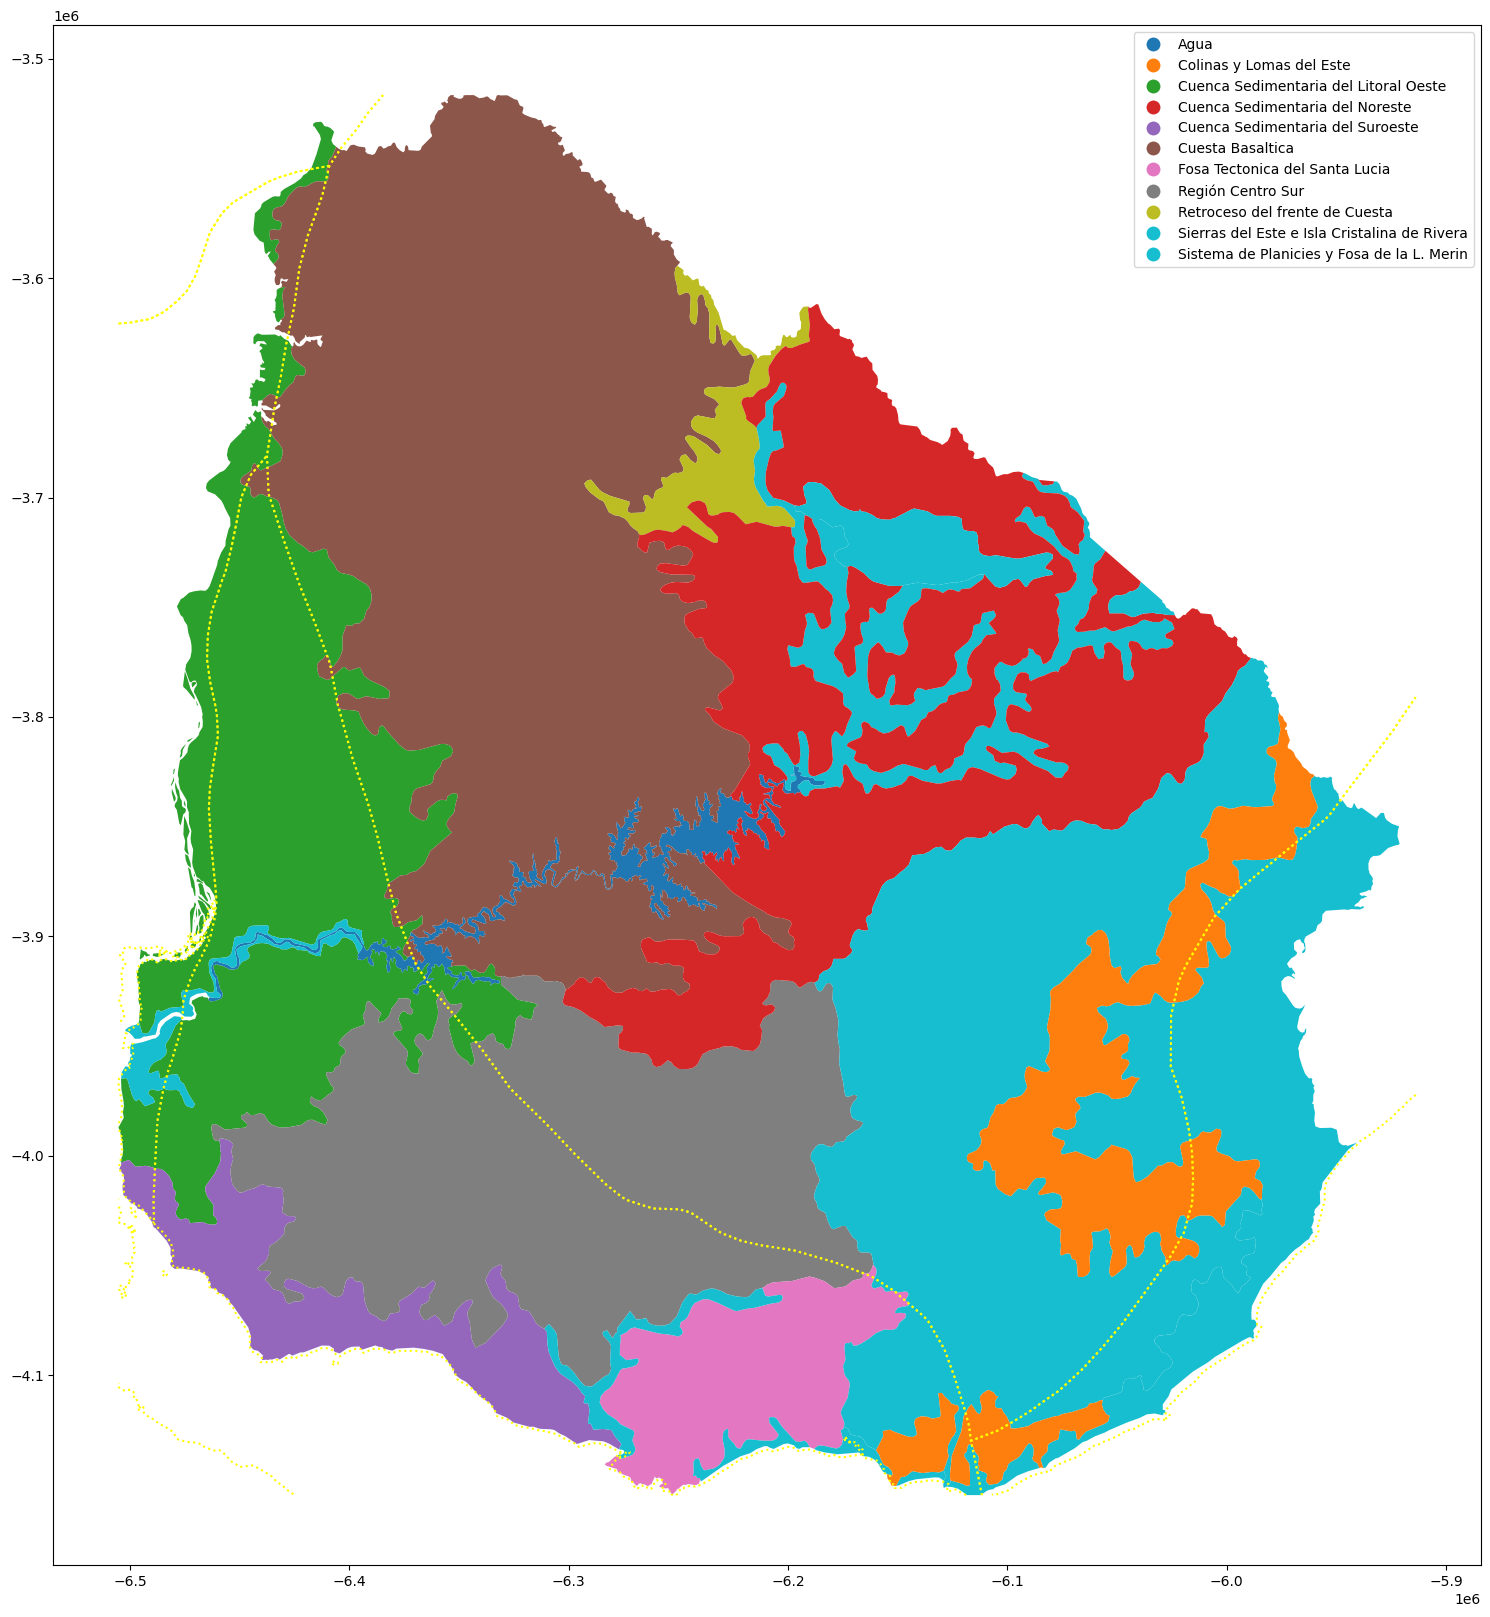

In [21]:
bbox = get_bbox_and_transform('UY')

fig, ax = plt.subplots(1, 1, figsize=(20,20))
base = gdf_suelos.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(column='GEOFORMA', ax = ax, legend='GEOFORMA')

gdf_eco.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='yellow', ls=':')

gdf_eco.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])) \
                .apply(annotate_zone_names, args=(base,), axis=1)

# profiles plot
profiles_gdf.plot(ax=base, marker='o', color='blue', markersize=20)

# uruguay boundary plot
country_borders_gdf = load_shape_file_into_gdf('country_borders')
country_borders_gdf.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='black')
base.set_title("ZONAS ECOLOGICAS - ZONAS DE SUELO - PERFILES DE SUELO - URUGUAY")

txt="Las lineas de puntos amarillas delimitan las zonas ecologicas. El orden de suelo esta codificado por color. Los perfiles son puntos azules en el mapa"
plt.figtext(0.5, 0.08, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig(os.path.join('output/PERFILES CON ZONAS DE SUELO Y ECOLOGICAS - URUGUAY.png'))

d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[
d:\anaconda3\envs\wosis\lib\site-packages\geopandas\tools\clip.py:63: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


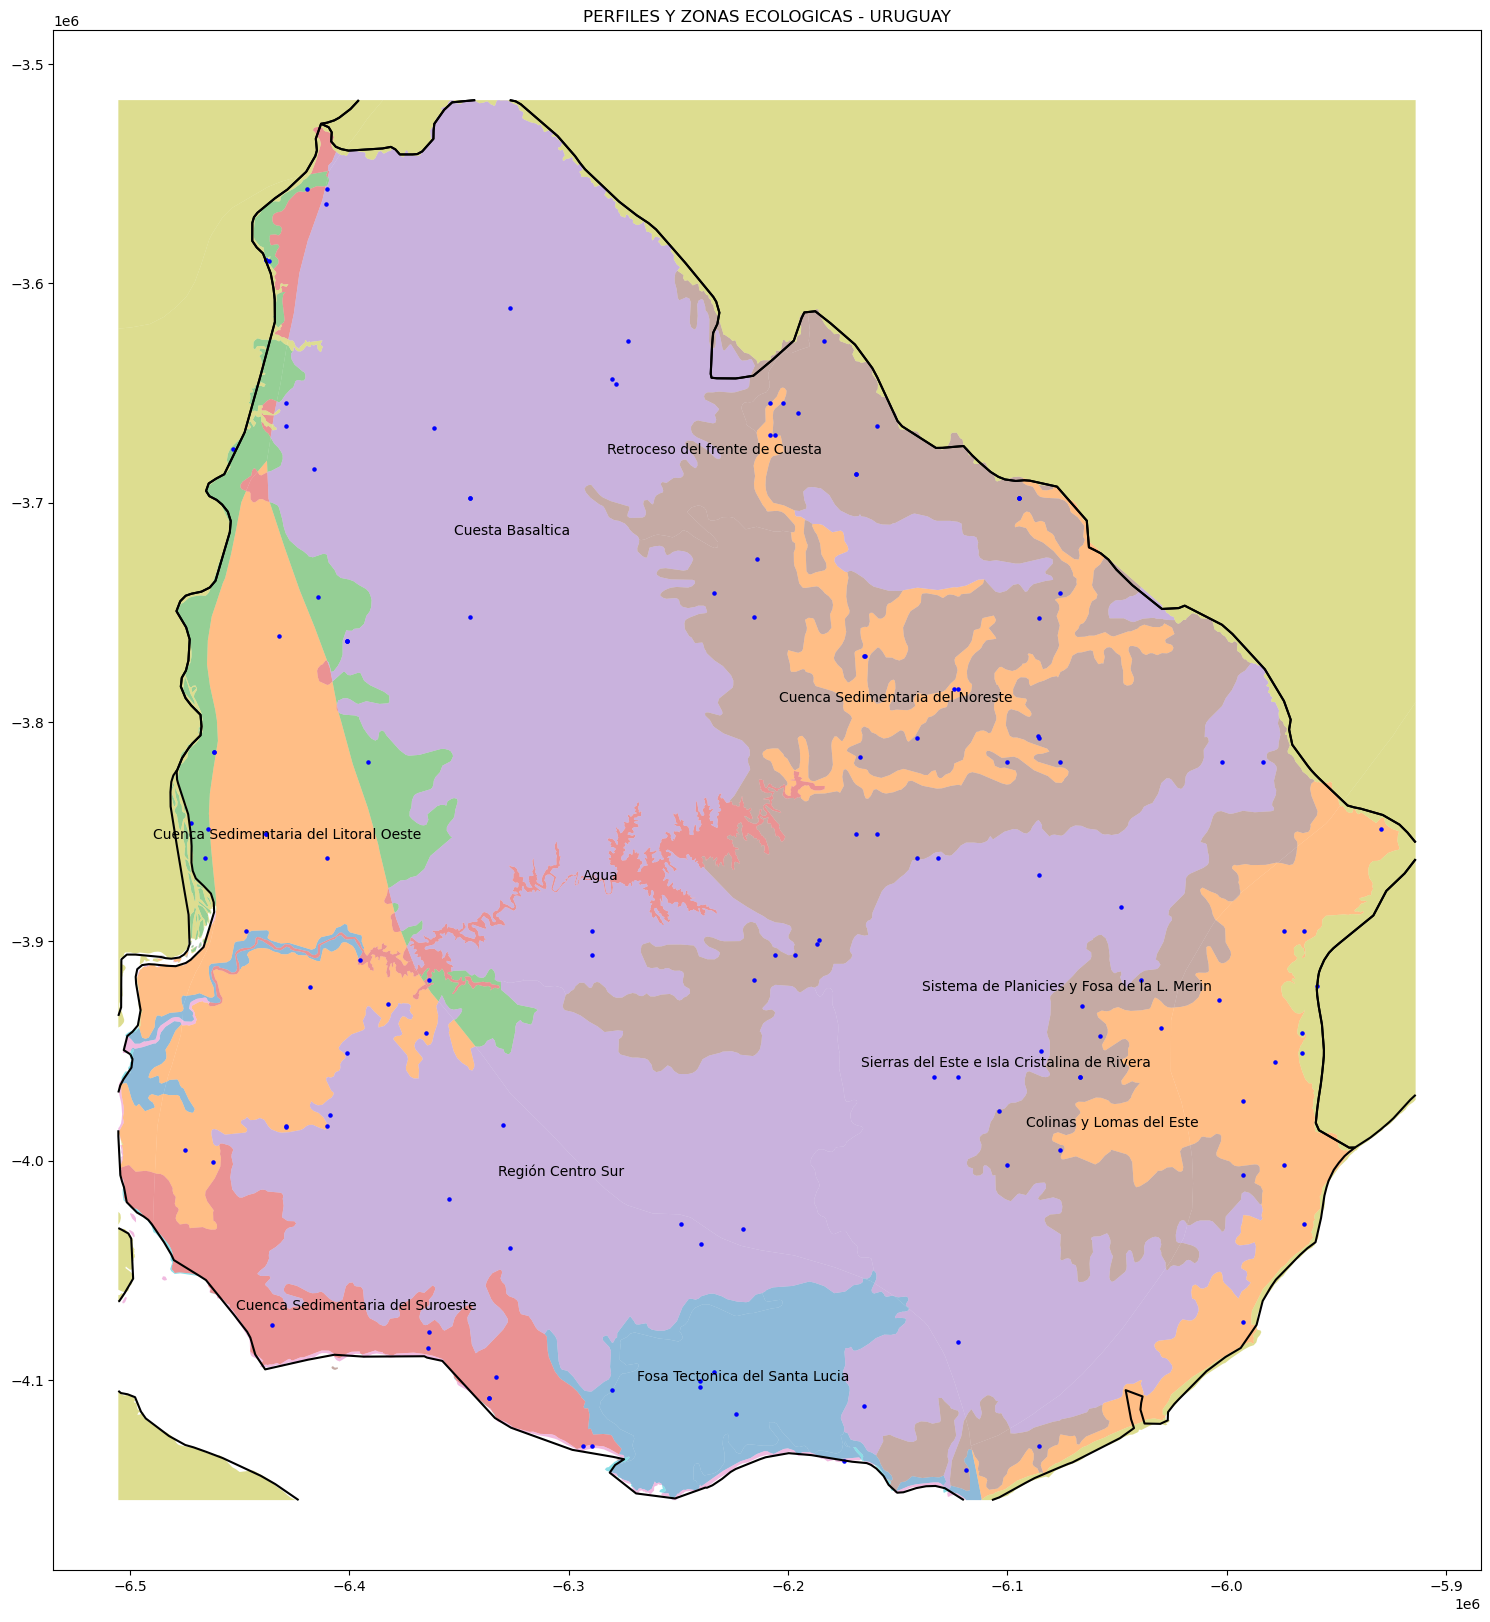

In [44]:
bbox = get_bbox_and_transform('UY')

fig, ax = plt.subplots(1, 1, figsize=(20,20))

res_union = gdf_eco.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).overlay(gdf_suelos.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])), how='union')
base = res_union.plot(alpha=0.5, cmap='tab10', ax=ax)

gdf_suelos.apply(lambda x: base.annotate(text=x['GEOFORMA'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# profiles plot
profiles_gdf.plot(ax=base, marker='o', color='blue', markersize=5)

# uruguay boundary plot
country_borders_gdf = load_shape_file_into_gdf('country_borders')
country_borders_gdf.boundary.clip(mask=(bbox[0], bbox[1], bbox[2], bbox[3])).plot(ax = base, color='black')
base.set_title("PERFILES Y ZONAS ECOLOGICAS - URUGUAY")
plt.show()